In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


Head:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  91

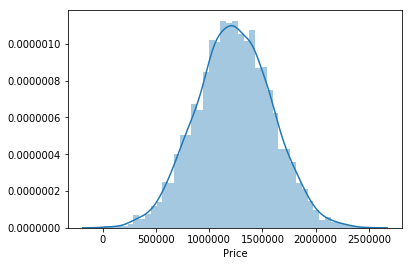

In [4]:
# to print the top 5 rows from the dataframe
print("Head:")
print(df.head())

# to check the total number of columns, total number of entries, etc.
print("Info:")
print(df.info())

# this will give the statistical information
print("Description:")
print(df.describe())

# to get the column names
print("Columns:")
print(df.columns)

# visualizing the data
# the line will show the distribution of price for houses in the dataset
# by using this we can determine the average prices
print("Distribution of Prices:")
sns.distplot(df['Price'])

# correlation between columns
# it will show correlation between all the columns in matrix form
print("Correlation:")
print(df.corr())

In [36]:
# now we will split the data into feature variables and response variable
# feature variables as X and response variable as y
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [37]:
# now split them into train and test data
from sklearn.model_selection import train_test_split
# test_size: is the percentage of data you want for testing
# random_state: assures a specific set of random data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)


-2647711.817898985
[2.16201290e+01 1.67130725e+05 1.20457919e+05 1.34655536e+03
 1.52398515e+01]


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

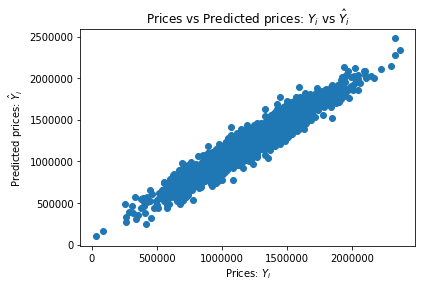

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# fit the linear model on the training data
lm.fit(X_train, y_train)

# check the coefficient
print(lm.intercept_)
print(lm.coef_)

# make predictions
y_pred = lm.predict(X_test)

# check the difference between predicted and original responses
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [39]:
#############################################################################################

In [40]:
# Importing Necessary Libraries
#https://www.edureka.co/blog/linear-regression-in-python/ 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
 
# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()
 
 
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

(237, 4)


In [41]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
m = len(X)
 
# Using the formula to calculate m and c
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
 
# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


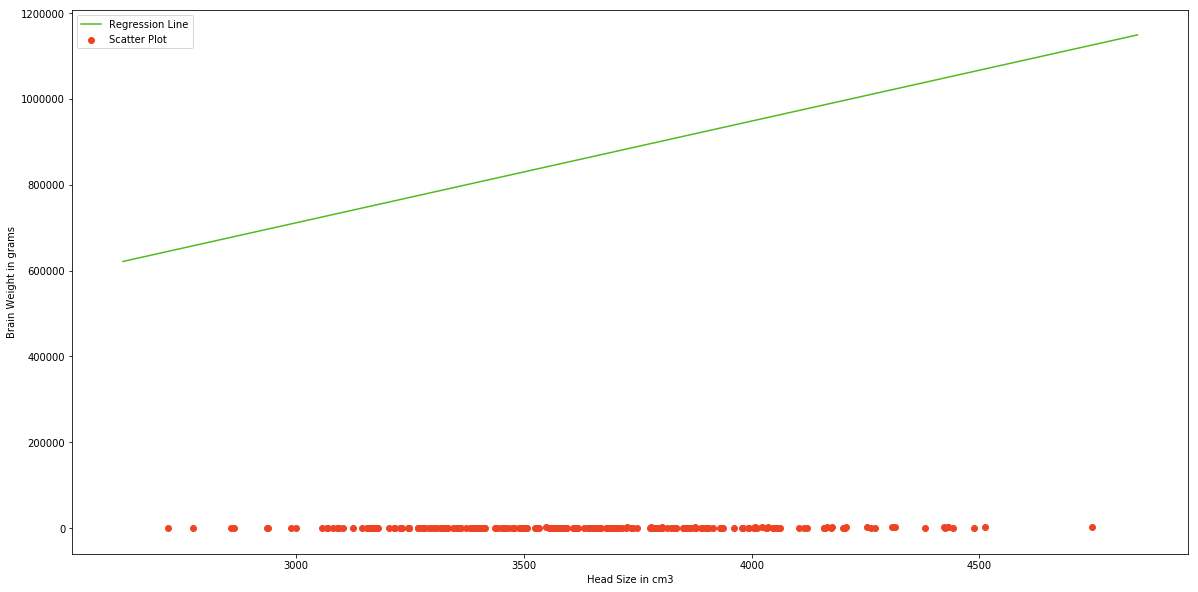

In [42]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 
 
# Ploting Line
plt.plot(x, y, color='#52b920', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef4423', label='Scatter Plot')
 
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [44]:
#ss_t is the total sum of squares and ss_r is the total sum of squares of residuals(relate them to the formula).
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [19]:
m

0.26342933948939945

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)


0.639311719957
